In [110]:
%matplotlib inline
%load_ext autoreload
import numpy as np
from scipy.misc import imread, imresize
from scipy.io import loadmat
import pickle
from lasagne.objectives import squared_error
from utils import collect_data, load_data, plot_img_dep, rmse, norm, plot_est
import matplotlib.pyplot as plt
import os
rsn = np.random.seed(seed=113)
volume_path = '../data'
dmax = 81.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Make3d Dataset2

http://make3d.cs.cornell.edu/data.html

- total of 425 image+depthmap pairs
- 3-d laser scanner (SICK LMS-291)
- image resolution of 1704x2272 
- depthmap resolution of 86x107.  
- 75% used as training 


ending loss 0.01103639043867588


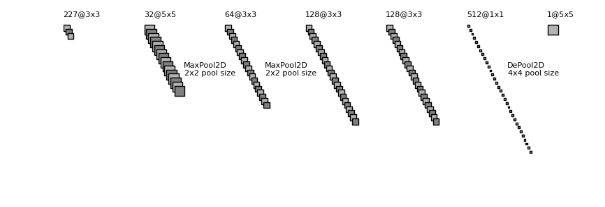

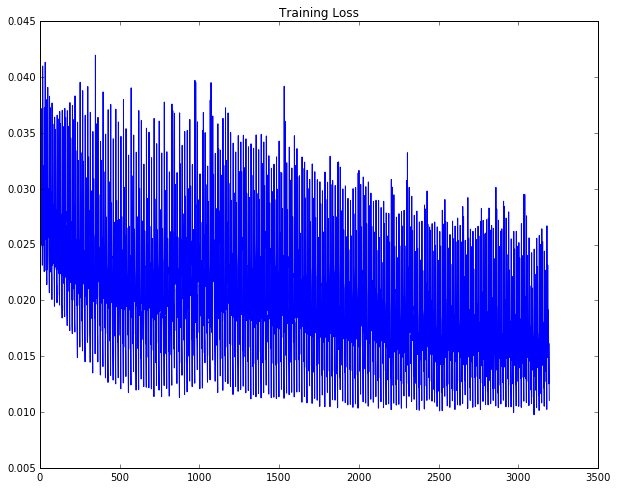

In [79]:
# Load my model - trained to 200 epochs using minibatches of 20 images each
minibatchsize = 20
epochn = 200
cnet = imread('convnet_fig.png')
plt.figure(frameon=False,figsize=(10,8))
p = plt.imshow(cnet)
plt.axis('off')
lp = pickle.load(open('trained/pda_e%s.pkl'%epochn, mode='rb'))
train_function = lp['train_function']
predict_function = lp['predict_function']
valid_function = lp['valid_function']
tl = lp['train_losses'][minibatchsize:minibatchsize*epochn]
print('ending loss', tl[-1])
plt.figure(frameon=False, figsize=(10,8))
plt.title("Training Loss")
plt.plot(tl)

In [80]:
# load data
images, dmaps = collect_data(volume_path, 'data2')
X_test, y_test = load_data(images, dmaps)

volume_path ../data data2
FOUND 100 matching images and depths
loading 100 images and depthmaps


Image: 90 RMSE: 0.107767558731


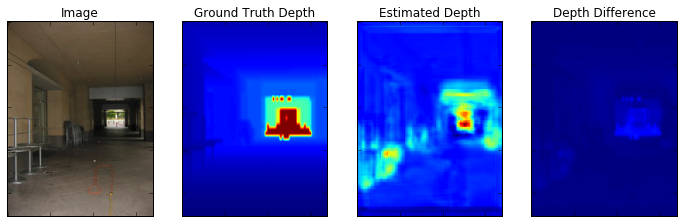

Image: 95 RMSE: 0.256018568087


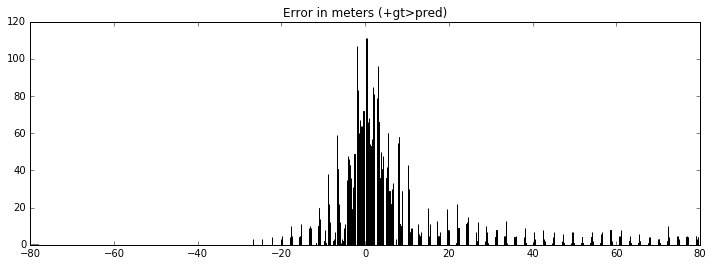

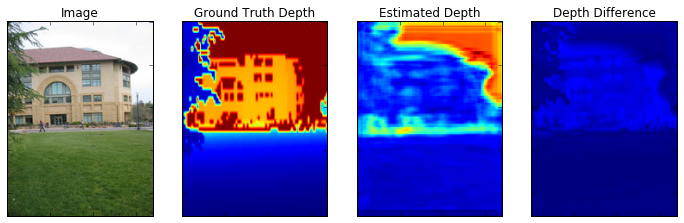

Image: 7 RMSE: 0.176197632709


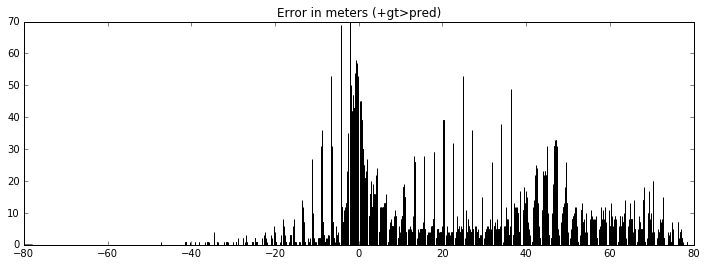

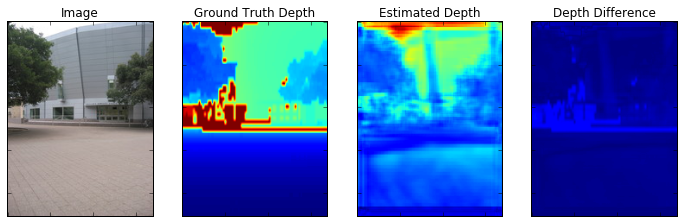

Image: 59 RMSE: 0.0760012310345


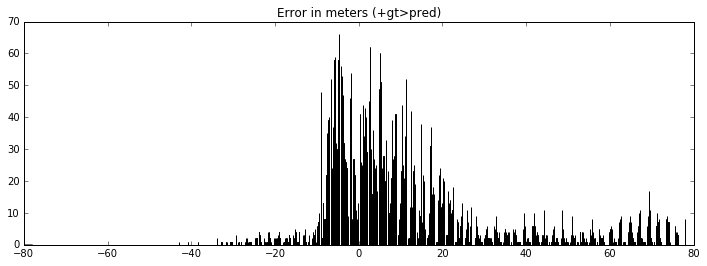

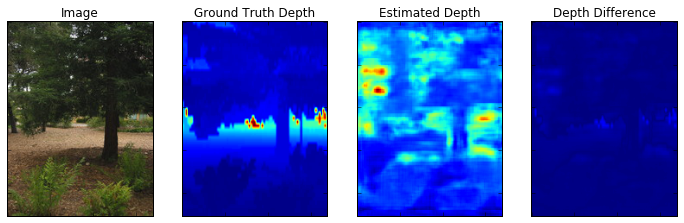

Image: 59 RMSE: 0.0760012310345


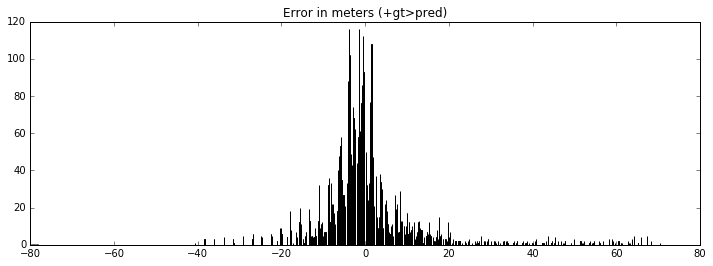

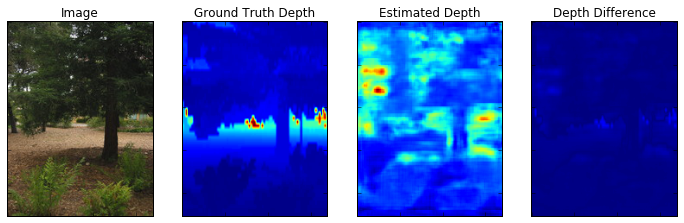

Average Error: 0.138397244319


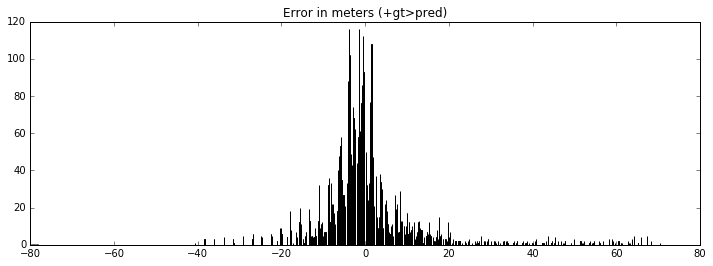

In [119]:
##### randomly select some test images
num_test_imgs = 5
img_ind = np.random.randint(0, len(images), size=num_test_imgs)
arms = 0
for inum in img_ind:
    test = X_test[inum,:,:,:]
    test_img_input = test[None,:,:,:]
    test_img = test.transpose(1,2,0)
    dpredict = predict_function(test_img_input)
    
    dgt = y_test[inum,0,:,:]
    dout = dpredict[0,0,:,:]
    depdif = abs(dout-dgt)
    err = np.exp(dout) - np.exp(dgt) 
    r = rmse(dgt,dout)
    arms += r
    titl = "Image: %s RMSE: %s" %(inum,r)
    print(titl)
    plot_img_dep(test_img, dgt, dout, depdif, titl)
    plt.figure(figsize=(12,4))
    dgtr = ((np.exp(dgt)-1))*dmax
    doutr = ((np.exp(dout)-1))*dmax
    plt.title("Error in meters (+gt>pred)")
    h,bins,patch = plt.hist(dgtr-doutr, bins=70, range=(-80,80))
arms = arms/float(num_test_imgs)
print("Average Error: %s" %arms)

(1, 3, 227, 170) (1, 3, 227, 170) float32


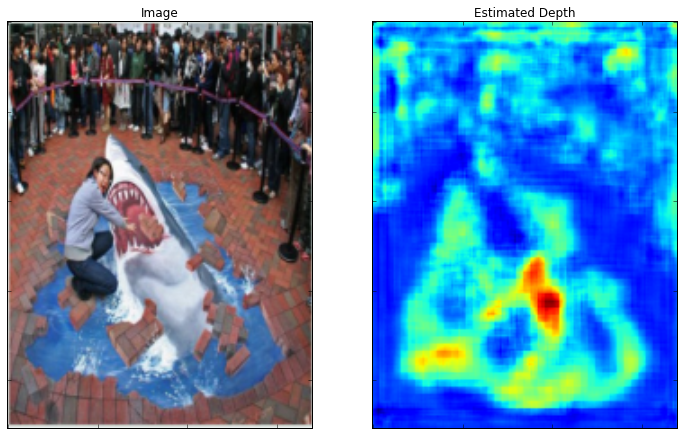

In [82]:
# Lets try with a fun image
si = imread('sidewalk.jpg')
simg = imresize(si, test_img.shape)
simgin = simg.transpose(2,0,1).astype('float32')/255.0
simgin = simgin[None,:,:,:]
print(simgin.shape, test_img_input.shape, simgin.dtype)
sdpredict = predict_function(simgin)
plot_est(simg, sdpredict[0,0,:,:])

(1, 3, 227, 170) (1, 3, 227, 170) float32


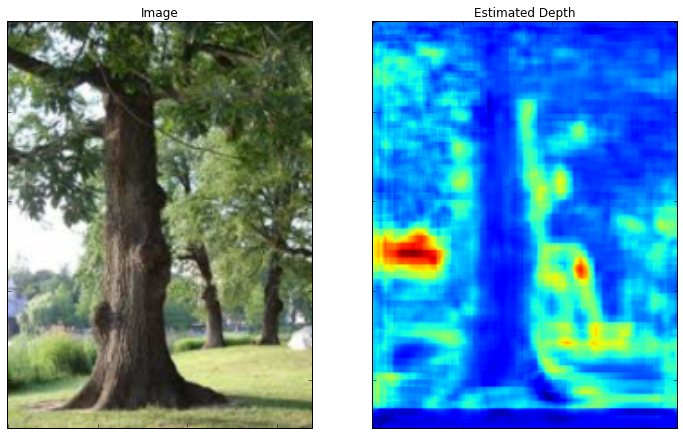

In [83]:
# Lets try with a fun image
si = imread('park.jpg')
simg = imresize(si, test_img.shape)
simgin = simg.transpose(2,0,1).astype('float32')/255.0
simgin = simgin[None,:,:,:]
print(simgin.shape, test_img_input.shape, simgin.dtype)
sdpredict = predict_function(simgin)
plot_est(simg, sdpredict[0,0,:,:])